# Homework 3 

* Practice some of the fundamentals of writing and using for loops. 
* Make some basic line using `matplotlib` and the `pyplot` submodule



In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import random

1. Write a function **cummean**, which computes the cumulative mean of any array provided as an input argument **numbers**.   The function returns an array whose 
* first element is the mean of the first element of **numbers**.  
* second element is the mean of the first 2 elements of **numbers**
* The third element is the mean of the first 3 elements of **numbers** 
 .... (keep going)
* last element is the mean of all the elements of **numbers** 

The function should return an array of cumulative means where each element adds one more entry of **numbers** to the mean.    

In [2]:
### BEGIN SOLUTION
def cummean(numbers):
    n = numbers.size
    numbermeans = np.zeros(n)
    for j in range(n):
        numbermeans[j] = np.mean(numbers[0:j+1])
    return numbermeans
### END SOLUTION 

In [3]:
rng = random.default_rng(seed = 1112)
numbers = rng.uniform(0,1,1000)
means = cummean(numbers)
assert np.isclose(means[3],0.64,rtol = 0.01)
assert np.isclose(means[99],0.43,rtol = 0.01)
assert np.isclose(means[499],0.49,rtol = 0.01)

2. Grading Problem. You get to write my code to make the final grades in this class. 

Your grade is based on 3 categories - 
* Classwork 40% 
* Tests 45%
* Homework 15%

As an example here are the grades for 5 students in each category

* classwork = [80, 95, 85, 55, 95]
* tests = [75, 90,90, 70,95]
* homework = [100, 90,95,90,95]

The grading scale is 

* A: finalgrade >= 89   
* B: finalgrade >= 79   
* C: finalgrade >= 69   
* D: finalgrade >= 59
* F: final grade < 60    

Write a function that takes in lists (or arrays) **classwork**, **tests**, **homework**, and returns the final student letter grades.   

In [4]:
### BEGIN SOLUTION
def makegrades(classwork,tests,homework):
    classwork = np.array(classwork)
    tests = np.array(tests)
    homework = np.array(homework)
    finalgrade = 0.4*classwork+0.45*tests+0.15*homework
    nstudents = finalgrade.size
    lettergrade = list()
    for j in range(nstudents):
        if finalgrade[j] >= 89:
            lettergrade.append('A')
        elif finalgrade[j] >= 79:
            lettergrade.append('B')
        elif finalgrade[j] >= 69:
            lettergrade.append('C')
        elif finalgrade[j] >= 59:
            lettergrade.append('D')
        else:
            lettergrade.append('F')
    return lettergrade
### END SOLUTION

In [5]:
classwork = np.array([80, 95, 85, 70, 95])
tests = np.array([75, 90,90, 55,95])
homework = np.array([100, 90,95,90,95])
lettergrade = makegrades(classwork,tests,homework)
print(lettergrade)
assert len(lettergrade) == 5
assert lettergrade[0] == 'B'
assert lettergrade[-2] == 'D'

['B', 'A', 'B', 'D', 'A']


 3. In your first year on a job you earn a starting salary.  *Every other year* your salary goes up by a fraction increase.  Make a function **future_salary** that returns an array that has your salary for every year up to a number of years provided as an argument to the function.  The input arguments to the function are the starting salary, increase (as a fraction) and number of years.   

In [6]:
### BEGIN SOLUTION 
def future_salary(starting,increase,nyears):
    salary = np.zeros(nyears)
    salary[0] = starting
    for j in range(1,nyears):
        if j%2 == 0:
            new_salary = salary[j-1]*(1+increase)
        else:
            new_salary = salary[j-1]
        salary[j]=new_salary
    return salary 
### END SOLUTION

In [7]:
nyears = 5
increase = 0.1 
starting = 100000
salary = future_salary(starting,increase,nyears)
assert len(salary)==nyears
assert salary[0] == salary[1]
assert salary[-1] > salary[-2]
assert np.isclose(salary[2],110000,rtol=0.0001)

In [8]:
nyears = 6
increase = 0.15 
starting = 40000
salary = future_salary(starting,increase,nyears)
assert len(salary)==nyears
assert salary[0] == salary[1]
assert salary[-1] == salary[-2]
assert np.isclose(salary[-1],52900,rtol=0.0001)

4. The sigmoid function is invaluable in both psychology and neuroscience research and also in artificial intelligence.
The equation for a sigmoid function is
$$ s(x) = \frac{e^{ax}}{e^{ax}+1} $$
a is a parameter that determines the shape of the function.

Write a function **sigmoid** that can be used to compute the sigmoid function following the equation above.

The argument **x** is an array containing the values at which you want to know the values of **s**.

The function should be defined such that **a** *takes the default value of 1*.

The function should take input arguments **x** and **a** and return **s** 

Useful hints: 
* The exponential function can be called as np.exp().  
  

In [9]:
### BEGIN SOLUTION
def sigmoid(x,a=1):
    s = np.exp(a*x)/(1+np.exp(a*x))
    return s
### END SOLUTION

In [10]:
x = np.arange(-10,10.5,0.5)
s = sigmoid(x)
assert len(s) == len(x)
assert s[20] == 0.5
assert np.isclose(s[19],0.3775,rtol = 0.005)

In [11]:
x = np.arange(-5,5,0.5)
a = 0.5
s = sigmoid(x,a) 
assert len(s) == len(x) 
assert s[10] == 0.5
assert np.isclose(s[5],0.223,rtol = 0.005)

5. Visualize how the value of **a** changes the shape of the sigmoid. 
* Make a graph of the values of **s** for three different values of **a** - 0.5, 1.0, 1.5. 
* Let **x** range from -10 to 10 in steps of 0.5.  
* Use different colored lines for the 3 graphs, and make a legend labeling the lines by the value of a.    
* You may use your own artistic sensibilities to choose colors and symbols. 

Colors - 
* blue - 'b',
* green - 'g',
* red - 'r',
* cyan - 'c',
* magenta - 'm',
* yellow - 'y',
* black - 'k',
* white - 'w' 

Line styles 

* '-' solid line 
* '--' dashed line
* '-.' dash dot line
* ':'  dotted line 

Marker shapes 
* '.'- point
* 'o' - circle
* 'x' - x marker 
* 'D' = diamond marker
* 'H' - hexagon marker 
* 's' - square marker
* '+' plus marker 

The example shown here contains all the important features of a well made graph.

![alt text](sigmoid.png "Sigmoid plot")


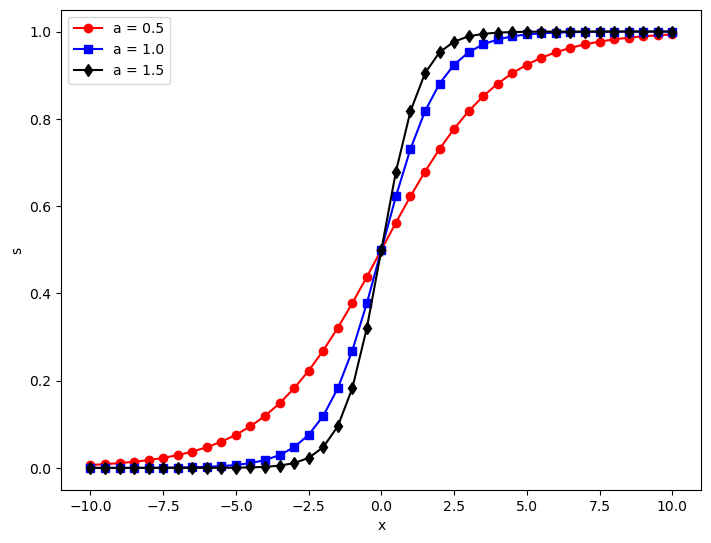

In [12]:
### BEGIN SOLUTION
x = np.arange(-10,10.5,0.5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
s = sigmoid(x,0.5)
ax.plot(x,s,'ro-',label = 'a = 0.5')
s = sigmoid(x,1)
ax.plot(x,s,'bs-',label = 'a = 1.0')
s = sigmoid(x,1.5)
ax.plot(x,s,'kd-',label = 'a = 1.5')
ax.set_xlabel('x')
ax.set_ylabel('s')
plt.legend()
plt.show()
### END SOLUTION
